# Tokyo Olympics 2021 - Exploratory Data Analysis




<img src="https://stillmed.olympics.com/media/Images/OlympicOrg/News/2017/06/09/2017-06-09-tokyo2020-thumbnail.jpg">

## Introduction

The 2020 Summer Olympics, officially the Games of the XXXII Olympiad and branded as Tokyo 2020, was an international multi-sport event held from 23 July to 8 August 2021 in Tokyo, Japan, with some preliminary events that began on 21 July.

## Purpose

To perform data analysis on Tokyo Olympics 2021. The analysis uses libraries of python like numpy, pandas, matplotlib, seaborn and geopandas.

## Dataset

We have 5 input dataset in the form of XLSX
1. Athletes.xlsx
    - Contains the data about athelete name, country they belong to and the game they are playing.
2. Coaches.xlsx
    - Contains the data about coach, country they belong to, game and the event.
3. EntriesGender.xlsx
    - Contains the information about the game and number of males and females which are participating in that game.
4. Medals.xlsx
    - Contains the data pertaining to countries, medals they won and their overall scoreboard.
5. Teams.xlsx
    - Contains the data related to team, game, coutry and the event

The data was obtained from __[Kaggle](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo)__

## Questions

I am trying to analyze the Tokyo Olympics 2021 dataset and answer a few of the questions like below:
# Update

------------------------------------------------------------------------------------------------------------------

**Install packages**

In [1]:
!pip install geopandas
!pip install wordcloud
# For graphs
!pip install plotly
# For exporting graph as image
!pip install kaleido

**Import packages**

In [78]:
import pandas as pd
import numpy as np

import os
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
import geopandas
from matplotlib import cm
import plotly as py
import plotly.graph_objs as go
import plotly.express as px


**Import Data**

In [33]:
athletes = pd.read_excel('./input/Athletes.xlsx', index_col=0)
coaches = pd.read_excel('./input/Coaches.xlsx', index_col=0)
e_gender = pd.read_excel('./input/EntriesGender.xlsx', index_col=0)
medals = pd.read_excel('./input/Medals.xlsx', index_col=0)
teams = pd.read_excel('./input/Teams.xlsx', index_col=0)

/Users/anonymous/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [4]:
athletes.head()

,NOC,Discipline
Name,,
AALERUD Katrine,Norway,Cycling Road
ABAD Nestor,Spain,Artistic Gymnastics
ABAGNALE Giovanni,Italy,Rowing
ABALDE Alberto,Spain,Basketball
ABALDE Tamara,Spain,Basketball


In [5]:
athletes.tail()

,NOC,Discipline
Name,,
ZWICKER Martin Detlef,Germany,Hockey
ZWOLINSKA Klaudia,Poland,Canoe Slalom
ZYKOVA Yulia,ROC,Shooting
ZYUZINA Ekaterina,ROC,Sailing
ZYZANSKA Sylwia,Poland,Archery


In [6]:
coaches.head()

,NOC,Discipline,Event
Name,,,
ABDELMAGID Wael,Egypt,Football,NaN
ABE Junya,Japan,Volleyball,NaN
ABE Katsuhiko,Japan,Basketball,NaN
ADAMA Cherif,Côte d'Ivoire,Football,NaN
AGEBA Yuya,Japan,Volleyball,NaN


In [7]:
coaches.tail()

,NOC,Discipline,Event
Name,,,
ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
ZIJP Simon,Netherlands,Hockey,NaN
ZONDI Nkuliso,South Africa,Hockey,Women


In [8]:
e_gender.head()

,Female,Male,Total
Discipline,,,
3x3 Basketball,32,32,64
Archery,64,64,128
Artistic Gymnastics,98,98,196
Artistic Swimming,105,0,105
Athletics,969,1072,2041


In [9]:
e_gender.tail()

,Female,Male,Total
Discipline,,,
Triathlon,55,55,110
Volleyball,144,144,288
Water Polo,122,146,268
Weightlifting,98,99,197
Wrestling,96,193,289


In [10]:
medals.head()

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
Rank,,,,,,
1,United States of America,39,41,33,113,1
2,People's Republic of China,38,32,18,88,2
3,Japan,27,14,17,58,5
4,Great Britain,22,21,22,65,4
5,ROC,20,28,23,71,3


In [11]:
medals.tail()

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
Rank,,,,,,
86,Ghana,0,0,1,1,77
86,Grenada,0,0,1,1,77
86,Kuwait,0,0,1,1,77
86,Republic of Moldova,0,0,1,1,77
86,Syrian Arab Republic,0,0,1,1,77


In [12]:
teams.head()

,Discipline,NOC,Event
Name,,,
Belgium,3x3 Basketball,Belgium,Men
China,3x3 Basketball,People's Republic of China,Men
China,3x3 Basketball,People's Republic of China,Women
France,3x3 Basketball,France,Women
Italy,3x3 Basketball,Italy,Women


In [13]:
teams.tail()

,Discipline,NOC,Event
Name,,,
South Africa,Water Polo,South Africa,Women
Spain,Water Polo,Spain,Men
Spain,Water Polo,Spain,Women
United States,Water Polo,United States of America,Men
United States,Water Polo,United States of America,Women


**Detailed information about dataset**

In [14]:
print('--> ATHLETES <--')
print(athletes.info())
print('\n--> COACHES <--')
print(athletes.info())
print('\n--> GENDER <--')
print(athletes.info())
print('\n--> MEDALS <--')
print(athletes.info())
print('\n--> TEAMS <--')
print(athletes.info())

--> ATHLETES <--
<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, AALERUD Katrine to ZYZANSKA Sylwia
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOC         11085 non-null  object
 1   Discipline  11085 non-null  object
dtypes: object(2)
memory usage: 259.8+ KB
None

--> COACHES <--
<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, AALERUD Katrine to ZYZANSKA Sylwia
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOC         11085 non-null  object
 1   Discipline  11085 non-null  object
dtypes: object(2)
memory usage: 259.8+ KB
None

--> GENDER <--
<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, AALERUD Katrine to ZYZANSKA Sylwia
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOC         11085 non-null  object
 1   Discipline  11085 non-null  ob

**General Statistics of the data**

In [15]:
athletes.describe()

,NOC,Discipline
count,11085,11085
unique,206,46
top,United States of America,Athletics
freq,615,2068


In [16]:
coaches.describe()

,NOC,Discipline,Event
count,394,394,249
unique,61,9,6
top,Japan,Basketball,Men
freq,35,74,94


In [17]:
e_gender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


In [18]:
medals.describe()

,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


In [19]:
teams.describe()

,Discipline,NOC,Event
count,743,743,743
unique,20,84,36
top,Swimming,Japan,Men
freq,113,48,120


**Data Cleaning**

In [20]:
# Fixing some of the country names
athletes['NOC'] = athletes['NOC'].replace('Democratic Republic of the Congo', 'Democratic republic of the congo')
athletes['NOC'] = athletes['NOC'].replace('United Republic of Tanzania', 'Tanzania')
athletes['NOC'] = athletes['NOC'].replace('People\'s Republic of China', 'China')
athletes['NOC'] = athletes['NOC'].replace('Islamic Republic of Iran', 'Iran')
athletes['NOC'] = athletes['NOC'].replace('ROC', 'Russia')


# Athletes count by country
athletes_by_country = athletes.groupby('NOC').count().reset_index()
athletes_by_country.columns = ['country', 'count']
athletes_by_country = athletes_by_country.sort_values('count', ascending=False)


**Checking for null values**

In [21]:
print('ATHLETES -->', athletes.isnull().values.any())
print('COACHES -->', coaches.isnull().values.any())
print('GENDER -->', e_gender.isnull().values.any())
print('MEDALS -->', medals.isnull().values.any())
print('TEAMS -->', teams.isnull().values.any())

ATHLETES --> False
COACHES --> True
GENDER --> False
MEDALS --> False
TEAMS --> False


In [22]:
# As Coaches dataframe has NaN values in Event column, we can replace it with 'Other'
coaches.fillna('Other', inplace=True)
coaches

,NOC,Discipline,Event
Name,,,
ABDELMAGID Wael,Egypt,Football,Other
ABE Junya,Japan,Volleyball,Other
ABE Katsuhiko,Japan,Basketball,Other
ADAMA Cherif,Côte d'Ivoire,Football,Other
AGEBA Yuya,Japan,Volleyball,Other
...,...,...,...
ZAMORA PEDREIRA Javier,Spain,Basketball,Other
ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,Other


**Checking for null values again**

In [23]:
print('ATHLETES -->', athletes.isnull().values.any())
print('COACHES -->', coaches.isnull().values.any())
print('GENDER -->', e_gender.isnull().values.any())
print('MEDALS -->', medals.isnull().values.any())
print('TEAMS -->', teams.isnull().values.any())

# Now we do not have any null values

ATHLETES --> False
COACHES --> False
GENDER --> False
MEDALS --> False
TEAMS --> False


### <font color='blue'>Athletes</font> 

**Visualization of athletes count by country**

Text(0.5, 1.0, 'Number of Athletes by Country')

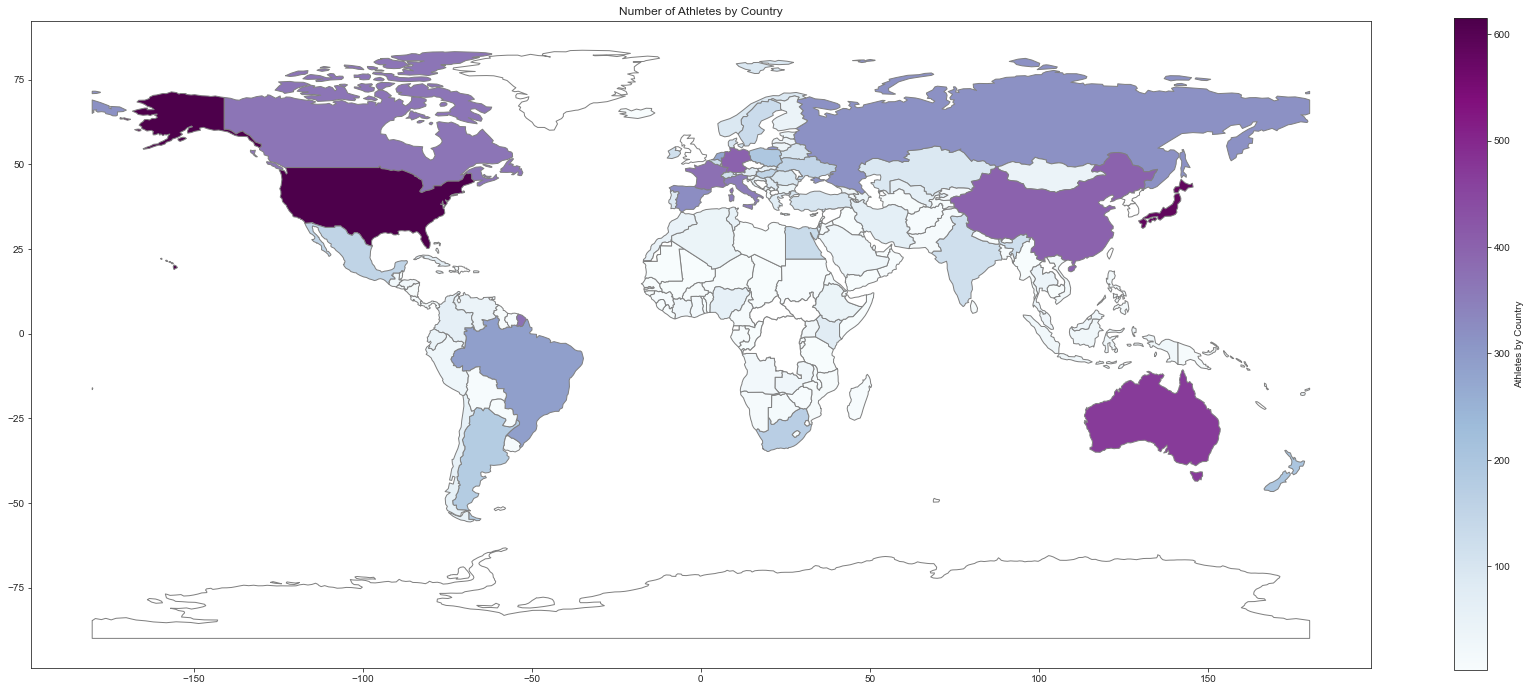

In [24]:
# Geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ath_country = world.merge(athletes_by_country, how = 'left', left_on=['name'], right_on=['country'])

# World Map
sb.set_style('ticks')
ath_country.plot('count', figsize=(30, 12), legend=True, edgecolor='gray', legend_kwds={'label': 'Athletes by Country'}, cmap='BuPu', missing_kwds={'color': 'white'})
plt.title('Number of Athletes by Country')


From above world map, based on color opacity we can conclude that, maximum number of athletes were from USA.

**Bar plot of Athletes number country wise**

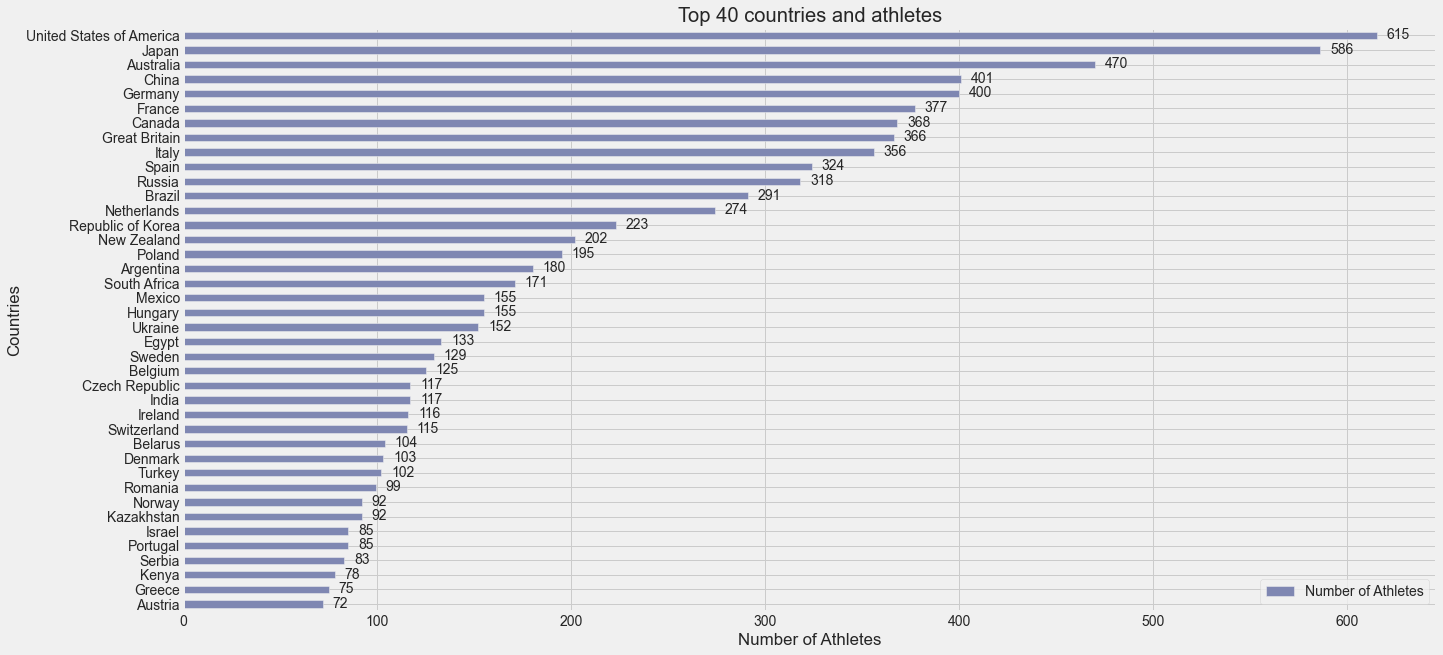

In [25]:
matplotlib.style.use('fivethirtyeight')
b_data = pd.DataFrame({'count': athletes_by_country['count'].values}, index = athletes_by_country['country']).head(40).sort_values(by='count', ascending=True)
ax = b_data.plot.barh(color='#7f87b2')
ax.set_title('Top 40 countries and athletes')
ax.set_xlabel('Number of Athletes')
ax.set_ylabel('Countries')
ax.figure.set_size_inches((20,10))
ax.legend(['Number of Athletes'])

for p in ax.patches:
    ax.annotate(p.get_width(),(p.get_width()+5,p.get_y()))

We can see that USA has the maximum number of athletes participating in the olympics.

**Participation of players in different games**

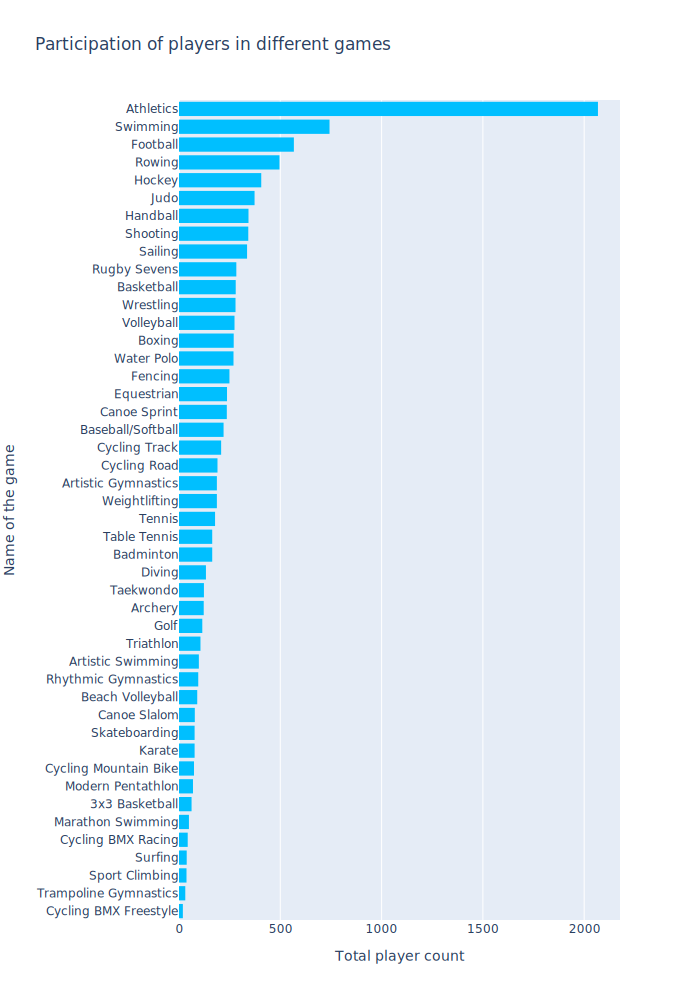

In [26]:
discipline_counts=athletes['Discipline'].value_counts().sort_values(ascending=True)
fig = px.histogram(
    y=discipline_counts.keys(),
    x=discipline_counts.values,
    height=1000,
    title='Participation of players in different games',
    color_discrete_sequence=['deepskyblue']
)
fig.update_layout(
    xaxis_title_text = 'Total player count',
    yaxis_title_text = 'Name of the game'
)
fig.show('svg')

### <font color='blue'>GENDER</font>

**Games Distribution based on Gender**

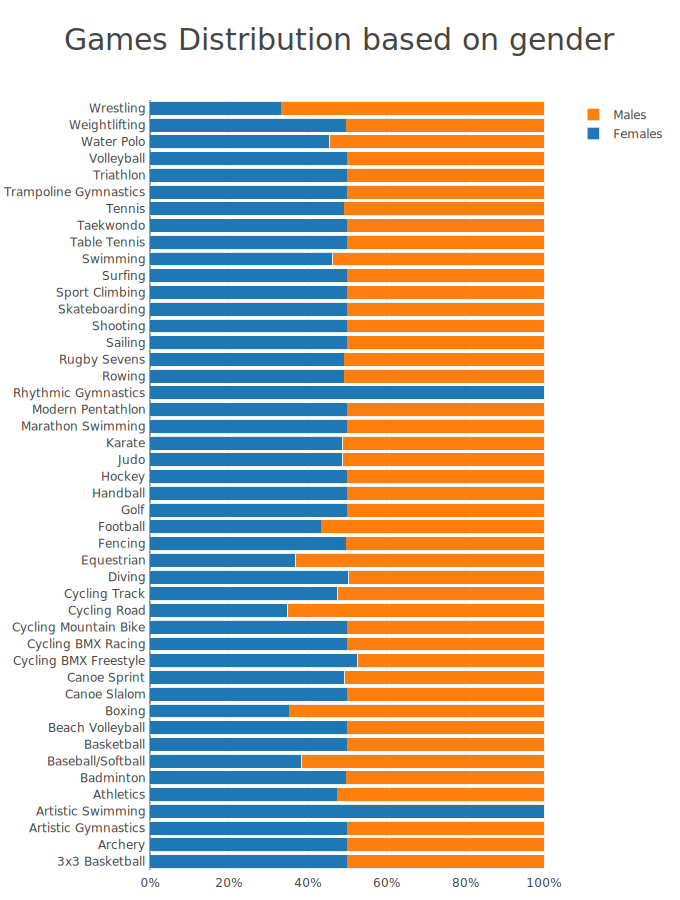

In [27]:
e_gender['discipline'] = e_gender.index
e_gender['f_ratio'] = e_gender['Female'] / e_gender['Total']
e_gender['m_ratio'] = e_gender['Male'] / e_gender['Total']

fig = go.Figure()
fig.add_trace(
    go.Bar(
        y=e_gender.discipline,
        x=e_gender.f_ratio,
        orientation='h',
        name='Females'
    )
)
fig.add_trace(
    go.Bar(
        y=e_gender.discipline,
        x=e_gender.m_ratio,
        orientation='h',
        name='Males'
    )
)

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))
fig.update_layout(
    title = 'Games Distribution based on gender',
    template = template,
    barmode='stack', 
    autosize=False,
    width=680,
    height=900,
    margin=dict(
      l=150,
      r=100,
       b=30,
       t=100,
       pad=4
    )
)

fig.layout.xaxis.tickformat = ',.0%'
fig.show('svg')


### <font color='blue'>MEDALS</font>

**Medals earned by countries**

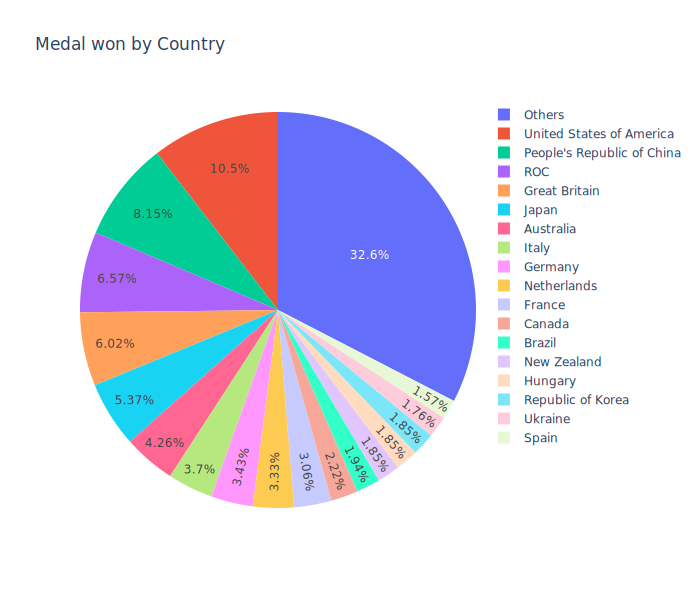

In [34]:
medals_pie = medals.copy()
medals_pie.loc[medals_pie['Total']<=15,'Team/NOC']='Others'
fig = px.pie(medals_pie, values='Total', names='Team/NOC', title='Medal won by Country', height=600) 
fig.show('svg')

From above Pie chart we can infer that USA won highest number of medals followed by China and Russia

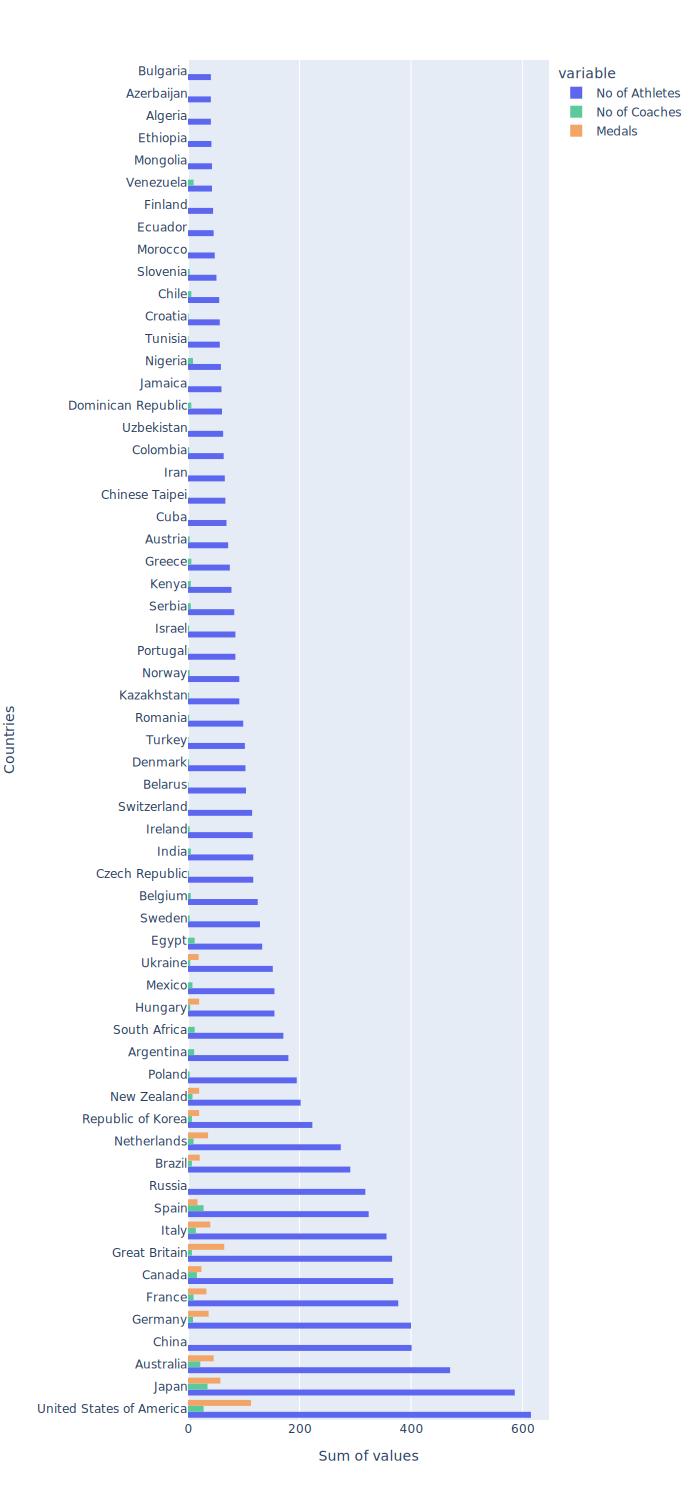

In [29]:
ath_countries_names = athletes.NOC.value_counts().keys()
ath_countries_values = athletes.NOC.value_counts().values
cch_countries_names = coaches.NOC.value_counts().keys()
cch_countries_values = coaches.NOC.value_counts().values
medals_countries_values = medals['Team/NOC']
medals_total_count = medals['Total']
medals_gold_count = medals['Gold']
medals_silver_count = medals['Silver']
medals_bronze_count = medals['Bronze']

df_athletes = pd.DataFrame({'NOC':ath_countries_names,'No of Athletes':ath_countries_values})
df_coaches = pd.DataFrame({'NOC':cch_countries_names,'No of Coaches':cch_countries_values})
df_medals = pd.DataFrame({'NOC':medals_countries_values,'Medals':medals_total_count,'Gold':medals_gold_count,'Silver':medals_silver_count,'Bronze':medals_bronze_count})
df_merge=pd.merge(left=df_athletes,right=df_coaches,how='outer',on='NOC')
df_merge=pd.merge(left=df_merge,right=df_medals,how='outer',on='NOC')
fig = px.histogram(
    df_merge[:61],
    y='NOC',
    x=['No of Athletes','No of Coaches','Medals'],
    barmode='group',
    height=1500,
    color_discrete_map = {'No of Athletes':'#5D66EE', 'No of Coaches': '#5CC99A', 'Medals':'#F2A567'}
)
fig.update_layout(
    xaxis_title_text = 'Sum of values',
    yaxis_title_text = 'Countries'
)
fig.show('svg')



**From above chart we get a lot of information if we look at the pattern closely**

1. USA has maximum number of athletes and total medals.
2. Great Britain has earned more number of medals than Canada, France and Italy despite of having less number of coaches and athletes than Canada, France and Italy.
3. Although Japan has more number of coaches than USA, Japan still secured less number of medals in total.
4. China has earned more number of medals than Australia despite of having less number of coaches and athletes than Australia


**Medals earned by participated countries**

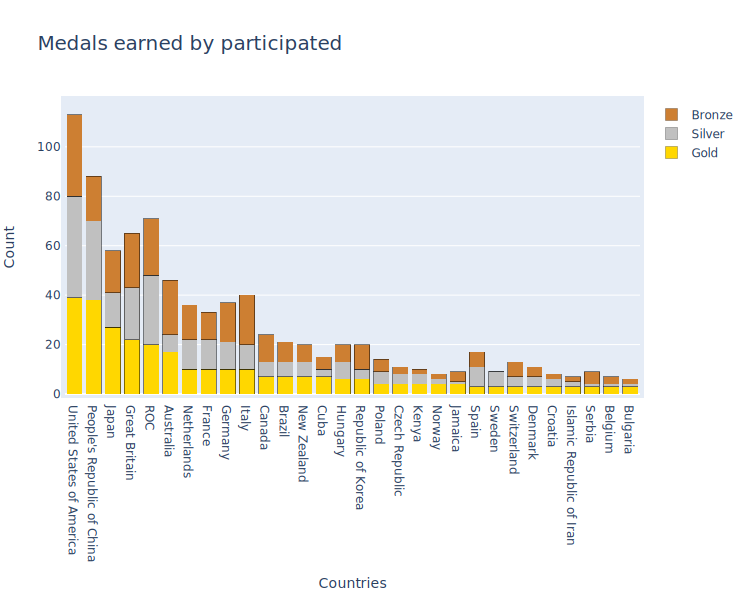

In [75]:
medals.rename(columns={'Team/NOC':'country'}, inplace=True)
medals_updated = medals.copy()
medals_updated['rank'] = medals_updated.index
medals_updated = medals_updated[medals_updated['rank'] <= 30]

trace1 = go.Bar(
    y=medals_updated.Gold,
    x=medals_updated.country,
    name='Gold',
    marker=dict(
        color='rgb(255,215,0)',
        line=dict(color='rgba(0, 0, 0, 0.5)')
    )
)

trace2 = go.Bar(
    y=medals_updated.Silver,
    x=medals_updated.country,
    name='Silver',
    marker=dict(
        color='rgb(192,192,192)',
        line=dict(color='rgba(0, 0, 0, 0.5)')
    )
)

trace3 = go.Bar(
    y=medals_updated.Bronze,
    x=medals_updated.country,
    name='Bronze',
    marker=dict(
        color='rgb(205, 127, 50)',
        line=dict(color='rgba(0, 0, 0, 0.5)')
    )
)

dt = [trace1, trace2, trace3]

layout = go.Layout(title= 'Medals earned by participated <br><sup>Top 20 countries by rank</sup>',
                   title_font=dict(family="Raleway", size=20),
                   barmode= 'stack',
                   autosize=False,
                   width = 750,
                   height=600,
                   margin=dict(
                      l=30,
                      r=30,
                      b=180,
                      t=100,
                      pad=4),
                   xaxis = {'title':'Countries'},
                   yaxis = {'title':'Count'})

fig = go.Figure(data = dt, layout = layout)
fig.show('svg')

**Word Cloud**

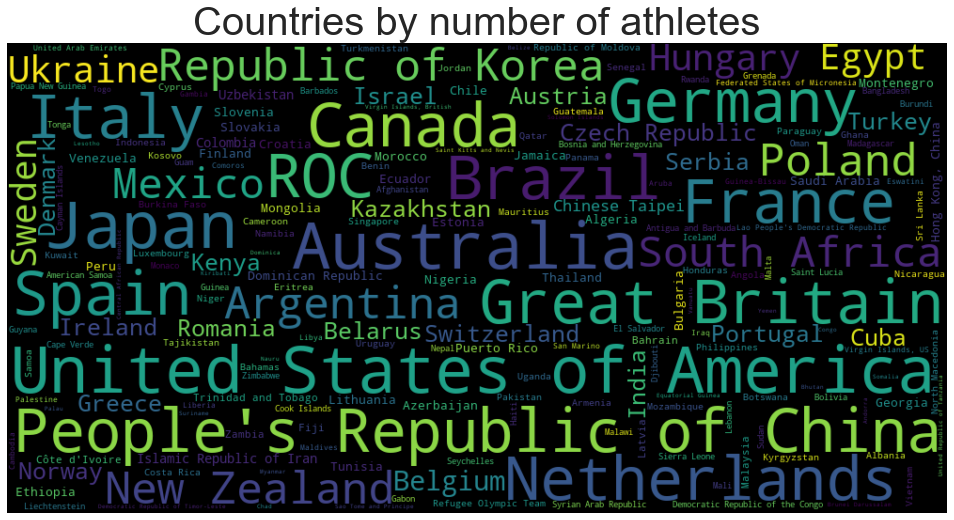

In [99]:
disc_count = athletes.NOC.value_counts()
sns.set_style("ticks")

wordcloud = WordCloud(
                    width=1000,
                    height=500, 
                    repeat=True,
                    random_state=50,
                    collocations=False)

wordcloud.generate_from_frequencies(frequencies = disc_count)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Countries by number of athletes', fontsize = 40)
plt.show('svg')